# 敵対的サンプルについての調査


# 準備

In [1199]:
import pandas as pd
import numpy as np
import os
import torch
import torch.nn as nn
# from caffe2.python.hypothesis_test_util import tensor

In [1200]:
df_orig = pd.read_csv('data/df_orig.csv')
df_orig.head()

,Unnamed: 0,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,num_dependents,own_telephone,foreign_worker,target
0,0,0.0,6.0,1169.0,4.0,4.0,4.0,4.0,67.0,2.0,1.0,1.0,0.0,1.0
1,1,1.0,48.0,5951.0,0.0,2.0,2.0,2.0,22.0,1.0,1.0,0.0,0.0,0.0
2,2,3.0,12.0,2096.0,0.0,3.0,2.0,3.0,49.0,1.0,2.0,0.0,0.0,1.0
3,3,0.0,42.0,7882.0,0.0,3.0,2.0,4.0,45.0,1.0,2.0,0.0,0.0,1.0
4,4,0.0,24.0,4870.0,0.0,2.0,3.0,4.0,53.0,2.0,2.0,0.0,0.0,0.0


In [1201]:
# データフレームについて
print(df_orig.shape)
print(df_orig.columns)
print(df_orig.dtypes)

(1000, 14)
Index(['Unnamed: 0', 'checking_status', 'duration', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'own_telephone', 'foreign_worker', 'target'],
      dtype='object')
Unnamed: 0                  int64
checking_status           float64
duration                  float64
credit_amount             float64
savings_status            float64
employment                float64
installment_commitment    float64
residence_since           float64
age                       float64
existing_credits          float64
num_dependents            float64
own_telephone             float64
foreign_worker            float64
target                    float64
dtype: object


In [1202]:
df_lowprofool = pd.read_csv("data/lowprofool.csv")
df_lowprofool.head(10)

,Unnamed: 0,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,num_dependents,own_telephone,foreign_worker,orig_pred,adv_pred,iters
0,685,1.000000,0.814131,0.325984,1.000000,0.506287,0.996926,1.000000,0.272946,0.010980,0.997956,1.000000,0.006270,0.0,1.0,1.0
1,727,0.021485,0.152601,0.113874,0.000000,0.500771,0.996601,1.000000,0.091283,0.318123,0.000000,0.018495,0.033961,0.0,1.0,3.0
2,30,0.332410,0.227944,0.090324,0.745154,0.230915,0.698068,0.197871,0.291535,0.000000,0.000000,1.000000,0.000000,1.0,0.0,3.0
3,376,1.000000,0.183932,0.125107,0.022441,0.015875,0.315572,0.664439,0.315666,0.328404,0.000000,0.002228,0.007525,0.0,1.0,2.0
4,66,0.999113,0.124049,0.105075,0.000000,0.253349,0.344591,0.355068,0.142215,0.016885,0.011121,0.000000,0.000000,1.0,0.0,2.0
5,965,0.331615,0.386553,0.077085,0.991230,0.490671,1.000000,0.249542,0.132214,0.000000,0.137137,0.000000,0.000000,1.0,0.0,2.0
6,963,0.989505,0.383094,0.170192,0.500147,1.000000,0.373134,0.329408,0.067940,0.084882,0.000000,1.000000,0.000000,1.0,0.0,62.0
7,61,0.268569,0.270414,0.220802,0.867303,0.968514,0.985967,1.000000,0.375979,0.124575,0.000000,0.982922,0.000000,1.0,0.0,90.0
8,282,0.664354,0.207619,0.057156,0.988956,0.754650,1.000000,0.561704,0.518603,0.000000,0.859700,0.000000,0.000000,1.0,0.0,92.0
9,268,0.001492,0.133646,0.468552,0.000000,1.000000,0.000000,0.880042,0.448337,0.049834,0.298907,1.000000,1.000000,0.0,1.0,3.0


In [1203]:
# データフレームについて
print(df_lowprofool.shape)
print(df_lowprofool.columns)
print(df_lowprofool.dtypes)

(10, 16)
Index(['Unnamed: 0', 'checking_status', 'duration', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'own_telephone', 'foreign_worker', 'orig_pred', 'adv_pred', 'iters'],
      dtype='object')
Unnamed: 0                  int64
checking_status           float64
duration                  float64
credit_amount             float64
savings_status            float64
employment                float64
installment_commitment    float64
residence_since           float64
age                       float64
existing_credits          float64
num_dependents            float64
own_telephone             float64
foreign_worker            float64
orig_pred                 float64
adv_pred                  float64
iters                     float64
dtype: object


In [1204]:
df_deepfool = pd.read_csv("data/deepfool.csv")
df_deepfool.head(10)

,Unnamed: 0,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,num_dependents,own_telephone,foreign_worker,orig_pred,adv_pred,iters
0,685,1.000000,0.814897,0.327537,1.000000,0.506130,0.997371,1.000000,0.273225,0.009566,0.998144,1.000000,0.005716,0.0,1.0,29.0
1,727,0.028603,0.157389,0.110642,0.000000,0.502370,0.996651,1.000000,0.095089,0.319265,0.000000,0.014723,0.028278,0.0,1.0,78.0
2,30,0.309885,0.255378,0.094025,0.736031,0.238950,0.678297,0.652959,0.287745,0.000000,0.000000,1.000000,0.000000,1.0,0.0,69.0
3,376,1.000000,0.186082,0.124218,0.019601,0.013874,0.318760,0.664843,0.309504,0.329251,0.000000,0.001798,0.006378,0.0,1.0,53.0
4,66,1.000000,0.130144,0.104848,0.000000,0.248175,0.343566,0.348300,0.145284,0.015518,0.013837,0.000000,0.000000,1.0,0.0,52.0
5,965,0.304551,0.397557,0.069027,0.987377,0.478270,0.999725,0.028270,0.141037,0.000000,0.011620,0.000000,0.000000,1.0,0.0,61.0
6,963,0.857138,0.429534,0.141906,0.426063,1.000000,0.587483,0.295928,0.078959,0.289119,0.000000,1.000000,0.000000,1.0,0.0,384.0
7,61,0.199558,0.289091,0.212238,0.867757,0.967532,0.986656,1.000000,0.387740,0.195354,0.018629,0.979391,0.000000,1.0,0.0,370.0
8,282,0.449761,0.306777,0.058778,0.917102,0.708124,1.000000,0.932391,0.452611,0.000000,0.091600,0.000000,0.000000,1.0,0.0,441.0
9,268,0.021468,0.108587,0.466310,0.000000,0.998313,0.000000,0.996148,0.456899,0.006362,0.027510,1.000000,0.999996,0.0,1.0,58.0


In [1205]:
# データフレームについて
print(df_deepfool.shape)
print(df_deepfool.columns)
print(df_deepfool.dtypes)

(10, 16)
Index(['Unnamed: 0', 'checking_status', 'duration', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'own_telephone', 'foreign_worker', 'orig_pred', 'adv_pred', 'iters'],
      dtype='object')
Unnamed: 0                  int64
checking_status           float64
duration                  float64
credit_amount             float64
savings_status            float64
employment                float64
installment_commitment    float64
residence_since           float64
age                       float64
existing_credits          float64
num_dependents            float64
own_telephone             float64
foreign_worker            float64
orig_pred                 float64
adv_pred                  float64
iters                     float64
dtype: object


In [1206]:
print(df_orig.columns)
print(df_lowprofool.columns)

Index(['Unnamed: 0', 'checking_status', 'duration', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'own_telephone', 'foreign_worker', 'target'],
      dtype='object')
Index(['Unnamed: 0', 'checking_status', 'duration', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'own_telephone', 'foreign_worker', 'orig_pred', 'adv_pred', 'iters'],
      dtype='object')


In [1207]:
df = pd.read_csv("data/df.csv")
df.head()
df.shape

(600, 14)

## IDで各モデルの出力結果を比較する

df_compareのmodel_idについて
- 0: df_orig
- 1: df_lowprofool
- 2: df_deepfool

In [1208]:
# model_idの作成
df_orig['model_id'] = 0
df_orig.rename(columns={'target': 'orig_pred'}, inplace=True)
df_orig['adv_pred'] = df_orig['orig_pred']
df_orig['iters'] = 0
df_lowprofool['model_id'] = 1
df_deepfool['model_id'] = 2

df_mix = pd.concat([df_orig, df_lowprofool, df_deepfool], sort=True, ignore_index=True)
df_mix

,Unnamed: 0,adv_pred,age,checking_status,credit_amount,duration,employment,existing_credits,foreign_worker,installment_commitment,iters,model_id,num_dependents,orig_pred,own_telephone,residence_since,savings_status
0,0,1.0,67.000000,0.000000,1169.000000,6.000000,4.000000,2.000000,0.000000,4.000000,0.0,0,1.000000,1.0,1.000000,4.000000,4.000000
1,1,0.0,22.000000,1.000000,5951.000000,48.000000,2.000000,1.000000,0.000000,2.000000,0.0,0,1.000000,0.0,0.000000,2.000000,0.000000
2,2,1.0,49.000000,3.000000,2096.000000,12.000000,3.000000,1.000000,0.000000,2.000000,0.0,0,2.000000,1.0,0.000000,3.000000,0.000000
3,3,1.0,45.000000,0.000000,7882.000000,42.000000,3.000000,1.000000,0.000000,2.000000,0.0,0,2.000000,1.0,0.000000,4.000000,0.000000
4,4,0.0,53.000000,0.000000,4870.000000,24.000000,2.000000,2.000000,0.000000,3.000000,0.0,0,2.000000,0.0,0.000000,4.000000,0.000000
5,5,1.0,35.000000,3.000000,9055.000000,36.000000,2.000000,1.000000,0.000000,2.000000,0.0,0,2.000000,1.0,1.000000,4.000000,4.000000
6,6,1.0,53.000000,3.000000,2835.000000,24.000000,4.000000,1.000000,0.000000,3.000000,0.0,0,1.000000,1.0,0.000000,4.000000,2.000000
7,7,1.0,35.000000,1.000000,6948.000000,36.000000,2.000000,1.000000,0.000000,2.000000,0.0,0,1.000000,1.0,1.000000,2.000000,0.000000
8,8,1.0,61.000000,3.000000,3059.000000,12.000000,3.000000,1.000000,0.000000,2.000000,0.0,0,1.000000,1.0,0.000000,4.000000,3.000000
9,9,0.0,28.000000,1.000000,5234.000000,30.000000,0.000000,2.000000,0.000000,4.000000,0.0,0,1.000000,0.0,0.000000,2.000000,0.000000


# 敵対的サンプルの特徴量の分布

In [1209]:
df_30 = df_mix[df_mix['Unnamed: 0'] == 30]
df_30

,Unnamed: 0,adv_pred,age,checking_status,credit_amount,duration,employment,existing_credits,foreign_worker,installment_commitment,iters,model_id,num_dependents,orig_pred,own_telephone,residence_since,savings_status
30,30,1.0,36.000000,1.000000,1913.000000,18.000000,1.000000,1.0,0.0,3.000000,0.0,0,1.0,1.0,1.0,3.000000,3.000000
1002,30,0.0,0.291535,0.332410,0.090324,0.227944,0.230915,0.0,0.0,0.698068,3.0,1,0.0,1.0,1.0,0.197871,0.745154
1012,30,0.0,0.287745,0.309885,0.094025,0.255378,0.238950,0.0,0.0,0.678297,69.0,2,0.0,1.0,1.0,0.652959,0.736031


In [1210]:
class GermanNet(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(GermanNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, H)
        self.linear3 = torch.nn.Linear(H, D_out)
        self.relu = torch.nn.ReLU()
        self.softmax = torch.nn.Softmax(dim=0)

    def forward(self, x):
        h1 = self.relu(self.linear1(x))
        h2 = self.relu(self.linear2(h1))
        h3 = self.relu(self.linear2(h2))
        h4 = self.relu(self.linear2(h3))
        h5 = self.relu(self.linear2(h4))
        h6 = self.relu(self.linear2(h5))
        a3 = self.linear3(h6)
        y = self.softmax(a3)
        return y

In [1211]:
model_path = 'model_data/model.pth'

D_in = 12
H = 100
D_out = 2

model = GermanNet(D_in, H, D_out)

if os.path.exists(model_path):
    model.load_state_dict(torch.load(model_path))
    model.eval()
else:
    print("Model file not found.")



# 既存のコードを一部変更

In [1212]:
from tqdm import tqdm
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import torch.nn as nn
from torch.autograd import Variable
import keras
from Adverse import lowProFool, deepfool
from Metrics import *

In [1213]:
from research import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


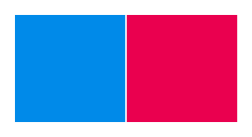

In [1214]:
# Retina display
%config InlineBackend.figure_format ='retina'
pd.set_option('display.max_columns', 500)
tqdm.pandas()
np.set_printoptions(suppress=True)

%load_ext autoreload
%autoreload 2

ccolors = ["#008ae9", "#ea004f"]
sns.set_palette(ccolors)
sns.palplot(sns.color_palette())

SEED = 0
DATASET = 'credit-g'

/root/.pyenv/versions/3.7.4/lib/python3.7/site-packages/sklearn/datasets/openml.py:305: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


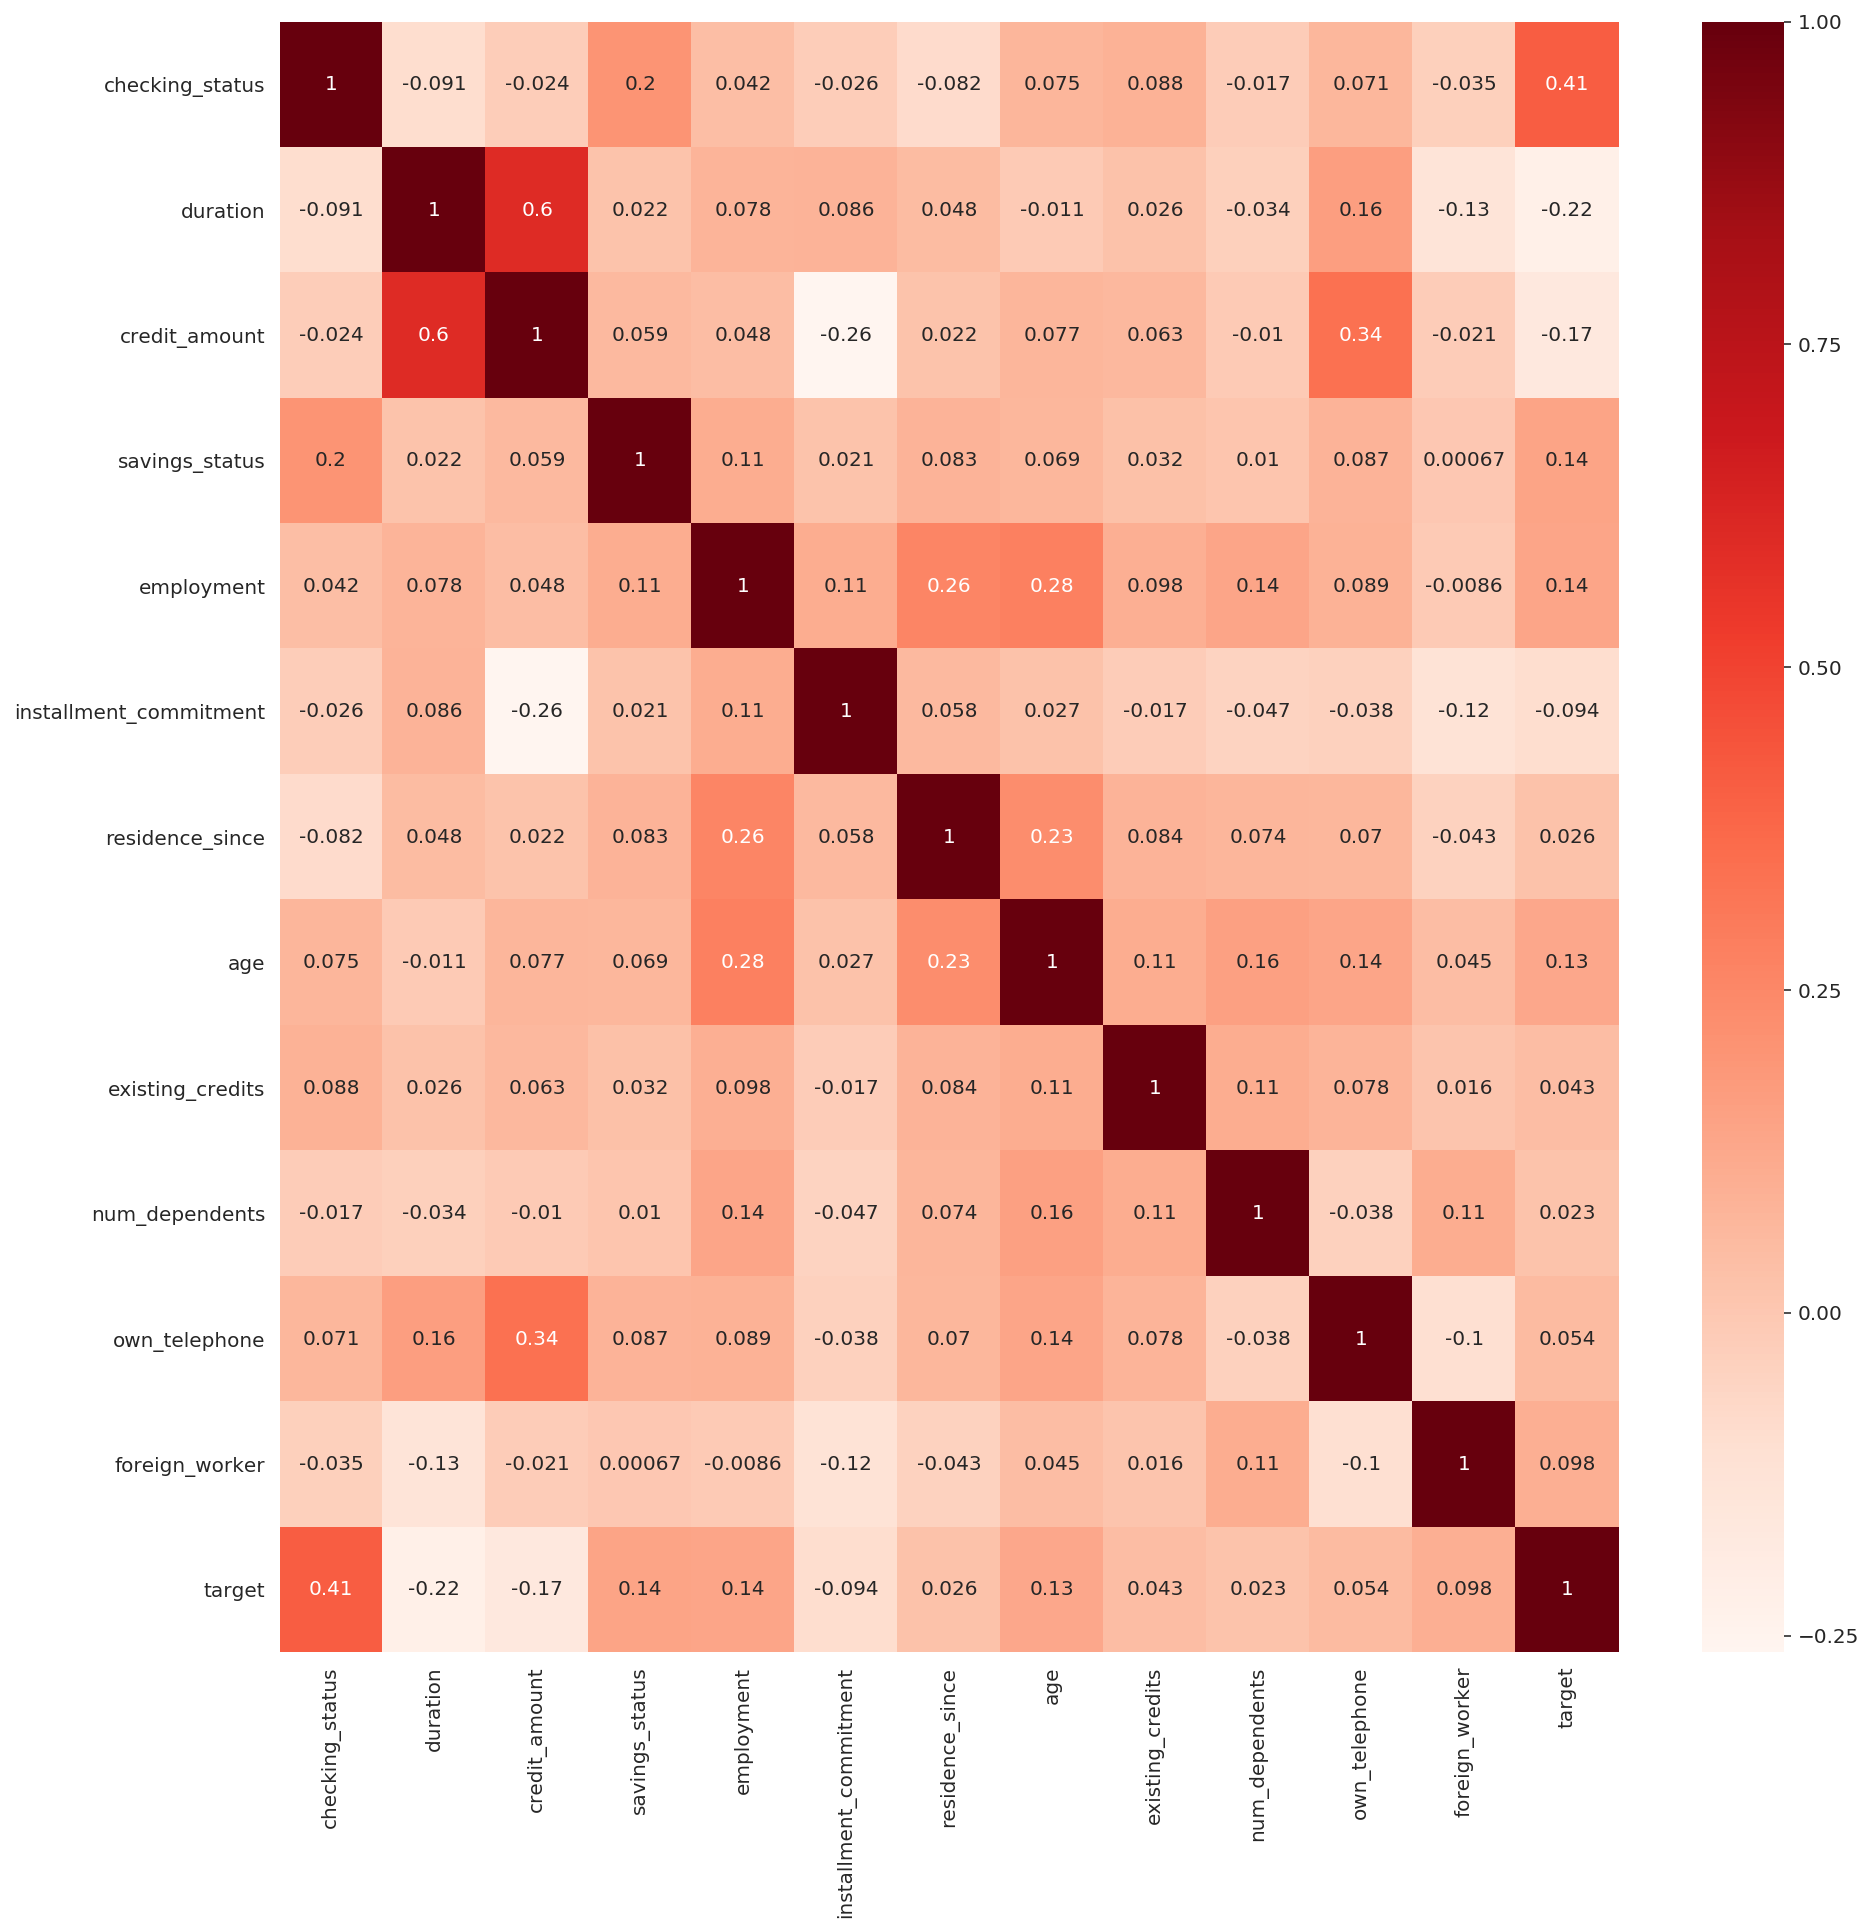

Input size: 12, Output size: 2
> epoch 0	Loss 0.00693	Acc 0.51667
> epoch 50	Loss 0.00654	Acc 0.73000
> epoch 100	Loss 0.00495	Acc 0.74667
> epoch 150	Loss 0.00465	Acc 0.77333
> epoch 200	Loss 0.00417	Acc 0.79667
> epoch 250	Loss 0.00334	Acc 0.85333
> epoch 300	Loss 0.00255	Acc 0.89000
> epoch 350	Loss 0.00192	Acc 0.91667


In [1215]:
# i. データの読み込み
# Load initial dataset
df_orig, target, feature_names = get_df(DATASET)

# ii. バランス
# Balance dataset classes
df = balance_df(df_orig.copy(), target, SEED)

# 2. 関数の呼び出し
bounds = get_bounds(df_orig)

# Normalize the data
scaler, df, bounds = normalize(df, target, feature_names, bounds)

# Compute the weihts modelizing the expert's knowledge
weights = get_weights(df, target)

# Split df into train/test/valid
df_train, df_test, df_valid = split_train_test_valid(df)

# Build experimenation config
config = {'Dataset'     : 'credit-g',
         'MaxIters'     : 20000,
         'Alpha'        : 0.001,
         'Lambda'       : 8.5,
         'TrainData'    : df_train,
         'TestData'     : df_test,
         'ValidData'    : df_valid,
         'Scaler'       : scaler,
         'FeatureNames' : feature_names,
         'Target'       : target,
         'Weights'      : weights,
         'Bounds'       : bounds}

# Train neural network
model = get_model(config)
config['Model'] = model

In [1216]:
# Sub sample
config['TestData'] = config['TestData'].sample(n=10, random_state = SEED)

# Generate adversarial examples
df_adv_lpf = gen_adv(config, 'LowProFool')
df_adv_df = gen_adv(config, 'Deepfool')
config['AdvData'] = {'LowProFool' : df_adv_lpf, 'Deepfool' : df_adv_df}

# Compute metrics
list_metrics = {'SuccessRate' : True,
                'iter_means': False,
                'iter_std': False,
                'normdelta_median': False,
                'normdelta_mean': True,
                'n_std': True,
                'weighted_median': False,
                'weighted_mean': True,
                'w_std': True,
                'mean_dists_at_org': False,
                'median_dists_at_org': False,
                'mean_dists_at_tgt': False,
                'mean_dists_at_org_weighted': True,
                'mdow_std': True,
                'median_dists_at_org_weighted': False,
                'mean_dists_at_tgt_weighted': True,
                'mdtw_std': True,
                'prop_same_class_arg_org': False,
                'prop_same_class_arg_adv': False}

all_metrics = get_metrics(config, list_metrics)
all_metrics = pd.DataFrame(all_metrics, columns=['Method'] + [k for k, v in list_metrics.items() if v])
all_metrics

685
output_prod [0.93616587 0.06383415]
727
output_prod [0.05435578 0.94564414]
30
output_prod [0.9281179  0.07188216]
376
output_prod [0.95730084 0.04269919]
66
output_prod [0.9388111  0.06118881]
965
output_prod [0.96961075 0.03038927]
963
output_prod [0.8873262  0.11267378]
61
output_prod [0.9505564  0.04944357]
282
output_prod [0.9707351  0.02926494]
268
output_prod [0.94965637 0.05034361]


685
727
30
376
66
965
963
61
282
268


,Method,SuccessRate,normdelta_mean,n_std,weighted_mean,w_std,mean_dists_at_org_weighted,mdow_std,mean_dists_at_tgt_weighted,mdtw_std
0,LowProFool,1.0,0.330233,0.325198,0.030820,0.019617,0.214625,0.085894,0.213805,0.083619
1,Deepfool,1.0,0.146643,0.120609,0.049681,0.049163,0.214625,0.085894,0.211506,0.081347


### NNの出力結果

In [1217]:
# Compute accuracy on test set
y_true = df_test[target]
x_test = torch.FloatTensor(df_test[feature_names].values)
y_pred_tensor = model(x_test) # こいつを少数で返すように変更する
y_pred = y_pred_tensor.detach().numpy()
print('y_pred\n', y_pred)
print('y_true\n', y_true)
print('y_pred:\n', y_pred.shape)
print('y_true:\n', y_true.shape)

y_pred
 [[0.001681   0.998319  ]
 [0.9973636  0.00263643]
 [0.93125725 0.06874274]
 [0.01978032 0.98021966]
 [0.00029031 0.99970967]
 [0.9999796  0.00002041]
 [0.14802809 0.85197186]
 [0.11995779 0.8800422 ]
 [0.03345929 0.96654075]
 [0.840842   0.15915802]
 [0.43103382 0.5689662 ]
 [0.01523358 0.9847665 ]
 [0.9966319  0.00336805]
 [0.8636972  0.13630278]
 [0.6757361  0.32426387]
 [0.00139812 0.99860185]
 [0.00048172 0.9995183 ]
 [0.23124251 0.7687575 ]
 [0.02835636 0.9716437 ]
 [0.0506869  0.9493131 ]
 [0.9385522  0.06144774]
 [0.09590282 0.9040972 ]
 [0.19671103 0.803289  ]
 [0.48333547 0.5166645 ]
 [0.9256627  0.07433732]
 [0.99996185 0.00003812]
 [0.00287363 0.9971264 ]
 [0.9396386  0.06036137]
 [0.1210841  0.8789159 ]
 [0.9795218  0.02047815]
 [0.00216685 0.9978332 ]
 [0.9327105  0.06728955]
 [0.96781206 0.03218789]
 [0.00029973 0.9997003 ]
 [0.99326247 0.00673753]
 [0.2266141  0.7733859 ]
 [0.999579   0.00042104]
 [0.6952141  0.3047859 ]
 [0.99928856 0.00071141]
 [0.94629306 0.05

### 混合行列

In [1218]:
from sklearn.metrics import confusion_matrix

In [1219]:
# accuracy
y_pred2 = np.argmax(y_pred_tensor.detach().numpy(), axis=1)
print("Accuracy score on test data", accuracy_score(y_true, y_pred2))

Accuracy score on test data 0.684


In [1220]:
# 混合行列
cm = confusion_matrix(y_true, y_pred2)
TN, FP, FN, TP = cm.ravel()
total = TN + FP + FN + TP

# 割合計算
TN_ratio = TN / total
FP_ratio = FP / total
FN_ratio = FN / total
TP_ratio = TP / total

# 結果を表示
print(f"TP ratio: {TP_ratio:.2f}")
print(f"TN ratio: {TN_ratio:.2f}")
print(f"FP ratio: {FP_ratio:.2f}")
print(f"FN ratio: {FN_ratio:.2f}")

TP ratio: 0.35
TN ratio: 0.34
FP ratio: 0.16
FN ratio: 0.15


In [1221]:
table = f"""
|\t\t\t|審査通過\t|失敗\t|
|予測成功\t|TP:{TP_ratio:.2f}\t|FP:{FP_ratio:.2f}|
|予測失敗\t|FN:{FN_ratio:.2f}\t|TN:{TN_ratio:.2f}|
"""

print(table)


|			|審査通過	|失敗	|
|予測成功	|TP:0.35	|FP:0.16|
|予測失敗	|FN:0.15	|TN:0.34|



| モデルの予測 \ 実際のラベル | 承認すべき (Positive) | 否認すべき (Negative) |
|-----------------|-----------------------|-----------------------|
| 承認 (Positive)   | TP (正しい承認)      | FP (誤った承認)       |
| 否認 (Negative)   | FN (誤った否認)      | TN (正しい否認)       |



### ヒストグラム

In [1222]:
# Convert y_true to a NumPy array
y_true_array = np.array(y_true)

# Extract the id from the index of y_true
ids = y_true.index.to_numpy()

# Extract the probability of y_pred being 1
y_pred_prob_1 = y_pred[:, 1]

# Create a DataFrame with the combined data
df_combined = pd.DataFrame({
    'id': ids,
    'y_true': y_true_array,
    'y_pred_prob_1': y_pred_prob_1
})

print(df_combined)

      id  y_true  y_pred_prob_1
0    791     1.0       0.998319
1     80     0.0       0.002636
2    291     0.0       0.068743
3    717     1.0       0.980220
4    781     1.0       0.999710
5    329     1.0       0.000020
6    795     1.0       0.851972
7    594     0.0       0.880042
8    279     1.0       0.966541
9    517     0.0       0.159158
10   227     0.0       0.568966
11   178     1.0       0.984766
12   287     1.0       0.003368
13   454     0.0       0.136303
14   385     1.0       0.324264
15   867     1.0       0.998602
16   956     1.0       0.999518
17   660     1.0       0.768758
18   121     1.0       0.971644
19   571     1.0       0.949313
20    91     1.0       0.061448
21   931     0.0       0.904097
22   293     1.0       0.803289
23   103     1.0       0.516665
24   549     1.0       0.074337
25   265     0.0       0.000038
26   100     1.0       0.997126
27   273     0.0       0.060361
28   449     0.0       0.878916
29   458     1.0       0.020478
..   ...

In [1223]:
arr = [685, 727, 30, 376, 66, 965, 963, 61, 282, 268]
for i in arr:
    row = df_combined[df_combined['id']==i]
    if not row.empty:  # 該当する行が存在する場合
        y_true = row['y_true'].values[0]
        y_pred_prob_1 = row['y_pred_prob_1'].values[0]
        
        # 条件に基づく判定
        if y_true == 1.0 and y_pred_prob_1 >= 0.5:
            ans = "TP" # 正しく承認を得た
        elif y_true == 0.0 and y_pred_prob_1 < 0.5:
            ans = "TN" # 問題なく否認できた
        elif y_true == 0.0 and y_pred_prob_1 >= 0.5:
            ans = "FP" # 不正な顧客にローンを通してしまった
        elif y_true == 1.0 and y_pred_prob_1 < 0.5:
            ans = "FN" # 承認を逃した
        else:
            ans = "Undefined"
        
        # 結果を出力
        print(f"id: {i}, y_true: {y_true}, y_pred_prob_1: {y_pred_prob_1}, 判定: {ans}")
    else:
        print(f"id: {i} はデータフレームに存在しません。")

id: 685, y_true: 1.0, y_pred_prob_1: 0.9838234186172485, 判定: TP
id: 727, y_true: 0.0, y_pred_prob_1: 0.3618552088737488, 判定: TN
id: 30, y_true: 1.0, y_pred_prob_1: 0.5090776681900024, 判定: TP
id: 376, y_true: 1.0, y_pred_prob_1: 0.9437327980995178, 判定: TP
id: 66, y_true: 1.0, y_pred_prob_1: 0.8891825079917908, 判定: TP
id: 965, y_true: 1.0, y_pred_prob_1: 0.8615749478340149, 判定: TP
id: 963, y_true: 0.0, y_pred_prob_1: 0.9979999661445618, 判定: FP
id: 61, y_true: 1.0, y_pred_prob_1: 0.9996019005775452, 判定: TP
id: 282, y_true: 1.0, y_pred_prob_1: 0.9958096742630005, 判定: TP
id: 268, y_true: 0.0, y_pred_prob_1: 0.8608801364898682, 判定: FP


In [1224]:
df_hist = df_combined.copy()
df_hist['y_pred'] = (df_hist['y_pred_prob_1'] >= 0.5)

for i in range(len(df_hist)):
    row = {'y_true': df_hist.iloc[i]['y_true'], 
           'y_pred': df_hist.iloc[i]['y_pred']}
    flag = get_flag(row)
    df_hist.loc[i, 'flag'] = f'flag_{flag}'
print(df_hist)

      id  y_true  y_pred_prob_1  y_pred     flag
0    791     1.0       0.998319    True  flag_TP
1     80     0.0       0.002636   False  flag_TN
2    291     0.0       0.068743   False  flag_TN
3    717     1.0       0.980220    True  flag_TP
4    781     1.0       0.999710    True  flag_TP
5    329     1.0       0.000020   False  flag_FN
6    795     1.0       0.851972    True  flag_TP
7    594     0.0       0.880042    True  flag_FP
8    279     1.0       0.966541    True  flag_TP
9    517     0.0       0.159158   False  flag_TN
10   227     0.0       0.568966    True  flag_FP
11   178     1.0       0.984766    True  flag_TP
12   287     1.0       0.003368   False  flag_FN
13   454     0.0       0.136303   False  flag_TN
14   385     1.0       0.324264   False  flag_FN
15   867     1.0       0.998602    True  flag_TP
16   956     1.0       0.999518    True  flag_TP
17   660     1.0       0.768758    True  flag_TP
18   121     1.0       0.971644    True  flag_TP
19   571     1.0    

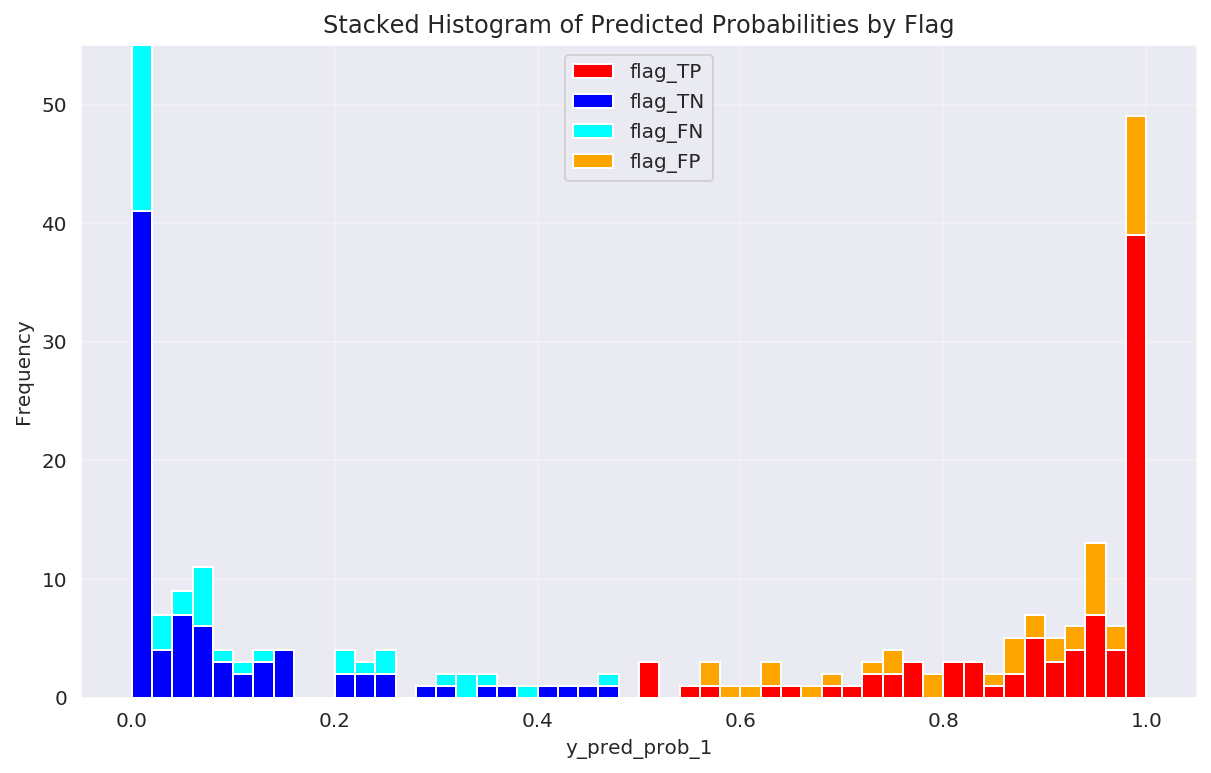

In [1225]:
plt.figure(figsize=(10, 6))
bins = np.arange(0, 1.02, 0.02)

# データを個別に準備
tp_data = df_hist[df_hist['flag'] == 'flag_TP']['y_pred_prob_1']
fn_data = df_hist[df_hist['flag'] == 'flag_FN']['y_pred_prob_1']
fp_data = df_hist[df_hist['flag'] == 'flag_FP']['y_pred_prob_1']
tn_data = df_hist[df_hist['flag'] == 'flag_TN']['y_pred_prob_1']

# 各フラグのヒストグラムを計算
tp_hist, _ = np.histogram(tp_data, bins=bins)
fn_hist, _ = np.histogram(fn_data, bins=bins)
fp_hist, _ = np.histogram(fp_data, bins=bins)
tn_hist, _ = np.histogram(tn_data, bins=bins)

# 積み上げヒストグラムを作成（下から順にTP, TN, FN, FP）
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.bar(bin_centers, tp_hist, width=0.02, color='red', label='flag_TP')
plt.bar(bin_centers, tn_hist, width=0.02, color='blue', label='flag_TN',
       bottom=tp_hist)
plt.bar(bin_centers, fn_hist, width=0.02, color='cyan', label='flag_FN',
       bottom=tp_hist+tn_hist)
plt.bar(bin_centers, fp_hist, width=0.02, color='orange', label='flag_FP',
       bottom=tp_hist+tn_hist+fn_hist)

plt.title('Stacked Histogram of Predicted Probabilities by Flag')
plt.xlabel('y_pred_prob_1')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.legend()